In [1]:
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 읽기
pop = pd.read_excel('/Users/jw/python/4.Study/data/시도_별_이동자수.xlsx', fillna=0, header=0)

In [2]:
# matplotlib 한글 폰트 오류 문제 해결
# 매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

In [3]:
# na(None, numpy.NaN...) 값을 앞의 데이터로 채우기
# 파이썬의 분석 라이브러리의 수정하는 메소드들은 대부분 수정해서 복사본을 리턴한다.
# 원본에 반영할 때는 다시 대입하거나 inplace 옵션이 있으면 이 옵션에 True를 대입
pop = pop.fillna(method='ffill')
print(pop.head())

전출지별   전입지별      1970      1971      1972      1973      1974      1975  \
0  전출지별   전입지별  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1    전국     전국   4046536   4210164   3687938   4860418   5297969   9011440   
2    전국  서울특별시   1742813   1671705   1349333   1831858   2050392   3396662   
3    전국  부산광역시    448577    389797    362202    482061    680984    805979   
4    전국  대구광역시         -         -         -         -         -         -   

       1976      1977  ...      2010      2011      2012      2013      2014  \
0  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1   6773250   7397623  ...   8226594   8127195   7506691   7411784   7629098   
2   2756510   2893403  ...   1733015   1721748   1555281   1520090   1573594   
3    724664    785117  ...    519334    508043    461042    478451    485710   
4         -         -  ...    370817    370563    348642    351873    350213   

       2015      2016      2017      2018      2019  

In [4]:
# 전출지별은 서울특별시이고 전입지는 서울특별시가 아닌 데이터만 추출하기 위한 조건 마늘기
mask = (pop["전출지별"] == "서울특별시") & (pop["전입지별"] != "서울특별시")
print(pop[mask])

전출지별     전입지별     1970     1971     1972     1973     1974     1975  \
19  서울특별시       전국  1448985  1419016  1210559  1647268  1819660  2937093   
21  서울특별시    부산광역시    11568    11130    11768    16307    22220    27515   
22  서울특별시    대구광역시        -        -        -        -        -        -   
23  서울특별시    인천광역시        -        -        -        -        -        -   
24  서울특별시    광주광역시        -        -        -        -        -        -   
25  서울특별시    대전광역시        -        -        -        -        -        -   
26  서울특별시    울산광역시        -        -        -        -        -        -   
27  서울특별시  세종특별자치시        -        -        -        -        -        -   
28  서울특별시      경기도   130149   150313    93333   143234   149045   253705   
29  서울특별시      강원도     9352    12885    13561    16481    15479    27837   
30  서울특별시     충청북도     6700     9457    10853    12617    11786    21073   
31  서울특별시     충청남도    15954    18943    23406    27139    25509    51205   
32  서울특별시     전라북

In [5]:
# 전출지별 열을 제거
df_seoul = pop[mask].drop(['전출지별'], axis=1)
print(df_seoul)

전입지별     1970     1971     1972     1973     1974     1975     1976  \
19       전국  1448985  1419016  1210559  1647268  1819660  2937093  2495620   
21    부산광역시    11568    11130    11768    16307    22220    27515    23732   
22    대구광역시        -        -        -        -        -        -        -   
23    인천광역시        -        -        -        -        -        -        -   
24    광주광역시        -        -        -        -        -        -        -   
25    대전광역시        -        -        -        -        -        -        -   
26    울산광역시        -        -        -        -        -        -        -   
27  세종특별자치시        -        -        -        -        -        -        -   
28      경기도   130149   150313    93333   143234   149045   253705   202276   
29      강원도     9352    12885    13561    16481    15479    27837    25927   
30     충청북도     6700     9457    10853    12617    11786    21073    18029   
31     충청남도    15954    18943    23406    27139    25509    51205    41

In [6]:
# 전입지별 컬럼이름을 전입지로 수정
# inplace 옵션을 이용해서 원본에 반영
df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)
print(df_seoul.head())

전입지     1970     1971     1972     1973     1974     1975     1976  \
19     전국  1448985  1419016  1210559  1647268  1819660  2937093  2495620   
21  부산광역시    11568    11130    11768    16307    22220    27515    23732   
22  대구광역시        -        -        -        -        -        -        -   
23  인천광역시        -        -        -        -        -        -        -   
24  광주광역시        -        -        -        -        -        -        -   

       1977     1978  ...     2010     2011     2012     2013     2014  \
19  2678007  3028911  ...  1848038  1834806  1658928  1620640  1661425   
21    27213    29856  ...    17418    18816    16135    16153    17320   
22        -        -  ...    10277    10397    10135    10631    10062   
23        -        -  ...    46082    51641    49640    47424    43212   
24        -        -  ...    11095    10587    10154     9129     9759   

       2015     2016     2017     2018     2019  
19  1726687  1655859  1571423  1549937  1476081  
21  

In [7]:
# 인덱스를 기존 컬럼이름으로 변경하고 컬럼은 제거
df_seoul.set_index('전입지', inplace=True)
print(df_seoul.head())

1970     1971     1972     1973     1974     1975     1976     1977  \
전입지                                                                             
전국     1448985  1419016  1210559  1647268  1819660  2937093  2495620  2678007   
부산광역시    11568    11130    11768    16307    22220    27515    23732    27213   
대구광역시        -        -        -        -        -        -        -        -   
인천광역시        -        -        -        -        -        -        -        -   
광주광역시        -        -        -        -        -        -        -        -   

          1978     1979  ...     2010     2011     2012     2013     2014  \
전입지                      ...                                                
전국     3028911  2441242  ...  1848038  1834806  1658928  1620640  1661425   
부산광역시    29856    28542  ...    17418    18816    16135    16153    17320   
대구광역시        -        -  ...    10277    10397    10135    10631    10062   
인천광역시        -        -  ...    46082    51641    49640  

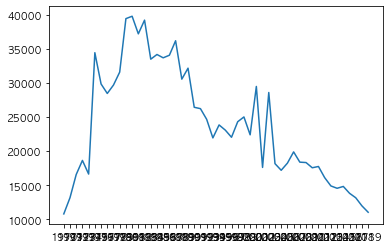

In [8]:
# 전라북도로 전출간 인원에 대한 선 그래프 그리기
sr_one = df_seoul.loc['전라북도']

#1970, 1971 제거
#sr_one.drop(['1970', '1971'], inplace=True)

plt.plot(sr_one.index, sr_one.values)

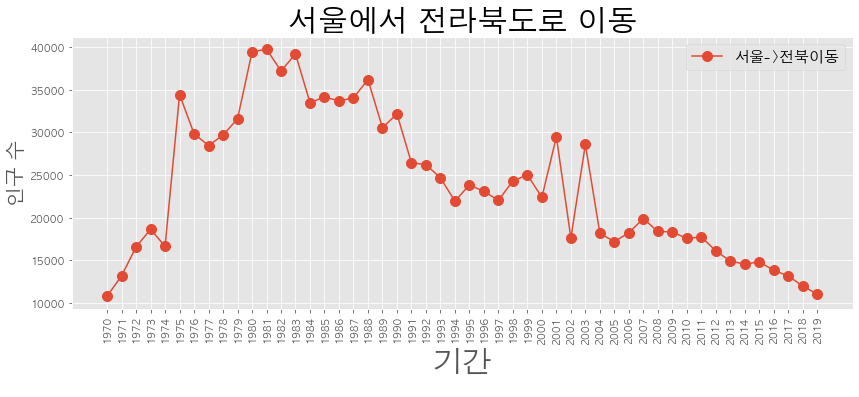

In [9]:
# 스타일 설정
plt.style.use('ggplot')
# 이미지 사이즈 설정 - 단위는 인치
plt.figure(figsize=(14, 5))
# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)  # 마커 표시 추가

# 그래프 제목 만들기
plt.title('서울에서 전라북도로 이동', size=30)
# 축제목
plt.xlabel('기간', size=30)
plt.ylabel('인구 수', size=20)
# 범례
plt.legend(labels=['서울->전북이동'], loc='best', fontsize=15)

# 그래프 위에 글자 작성
plt.annotate('인구이동 감소', xy=(35, 200), rotation=-15, va='baseline', ha='center', fontsize=20)

plt.show()

In [10]:
# 기존 데이터에서 전라남도에서 서울로 이동한 인구수찾기
mask = (pop['전출지별'] == '전라북도') & (pop['전입지별'] != '전라북도')
df_jeo = pop[mask]
print(df_jeo.head())

전출지별   전입지별    1970    1971    1972    1973    1974    1975    1976  \
235  전라북도     전국  228126  240338  190364  238830  245518  505510  323710   
236  전라북도  서울특별시   71785   63688   39692   55168   60827  118342   83263   
237  전라북도  부산광역시    6633    7100    4764    6476    9731   15304   11784   
238  전라북도  대구광역시       -       -       -       -       -       -       -   
239  전라북도  인천광역시       -       -       -       -       -       -       -   

       1977  ...    2010    2011    2012    2013    2014    2015    2016  \
235  353025  ...  308237  306290  275126  260395  276900  264662  252607   
236   75212  ...   18777   17600   17180   15495   15902   14830   14993   
237   13927  ...    1518    1651    1508    1471    1621    1731    1582   
238       -  ...     924     899    1033    1018     880     861     893   
239       -  ...    3844    3987    4075    3871    3588    3395    3415   

       2017    2018    2019  
235  239253  257097  241523  
236   14930   15664   15267  
2

In [11]:
#전출지별 컬럼 제거하기
df_jeo = df_jeo.drop(['전출지별'], axis=1)
# 컬럼이름 변경하기
df_jeo.rename({'전입지별': '전입지'}, axis=1, inplace=True)
# 인덱스 설정하기
df_jeo.set_index('전입지', inplace=True)
# 서울로 이동한 데이터만 가져오기
sr_two = df_jeo.loc['서울특별시']
print(sr_two.head())

1970    71785
1971    63688
1972    39692
1973    55168
1974    60827
Name: 서울특별시, dtype: object


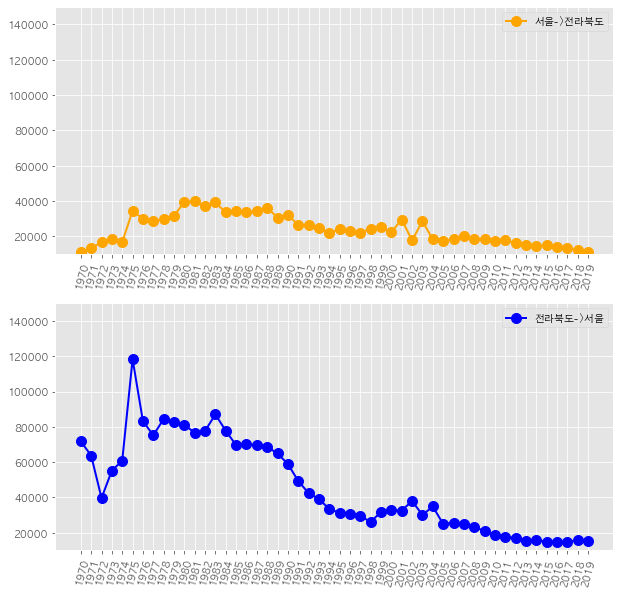

In [12]:
# 여러개의 그래프를 그리기 위해서 그리기 객체를 돌려받음 
fig = plt.figure(figsize=(10, 10))
# 2행 1열에서 1번
ax1 = fig.add_subplot(2, 1, 1)
# 2행 1열에서 2번 
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(sr_one, marker='o', markersize=10, color='orange', linewidth=2, label='서울->전라북도')
ax1.legend(loc='best')
ax2.plot(sr_two, marker='o', markersize=10, color='blue', linewidth=2, label='전라북도->서울')
ax2.legend(loc='best')

#y축 눈금범위 설정
ax1.set_ylim(10000, 150000)
ax2.set_ylim(10000, 150000)

ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_two.index, rotation=75)

plt.show()

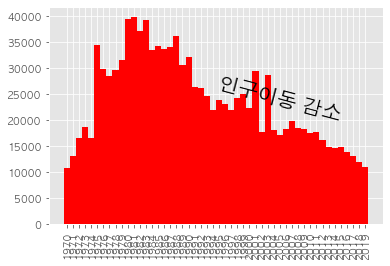

In [13]:
# 막대 그래프 그리기
plt.bar(sr_one.index, sr_one, width=1, color='r')
# x축 레이블 변경
plt.xticks(range(0, len(sr_one.index), 1), sr_one.index, rotation='vertical')

# 그래프 위에 글자 작성
plt.annotate('인구이동 감소', xy=(35, 20000), rotation=-15, va='baseline', ha='center', fontsize=20)
plt.show()